
## mvp

In [0]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, FloatType, StringType

# Create a Spark session
spark = SparkSession.builder \
    .appName("Loading Student Data") \
    .getOrCreate()


In [0]:
# Define the data schema
schema = StructType([
    StructField("StudentID", IntegerType(), True),
    StructField("Age", IntegerType(), True),
    StructField("Gender", IntegerType(), True),
    StructField("Ethnicity", IntegerType(), True),
    StructField("ParentalEducation", IntegerType(), True),
    StructField("StudyTimeWeekly", FloatType(), True),
    StructField("Absences", IntegerType(), True),
    StructField("Tutoring", IntegerType(), True),
    StructField("ParentalSupport", IntegerType(), True),
    StructField("Extracurricular", IntegerType(), True),
    StructField("Sports", IntegerType(), True),
    StructField("Music", IntegerType(), True),
    StructField("Volunteering", IntegerType(), True),
    StructField("GPA", FloatType(), True),
    StructField("GradeClass", IntegerType(), True)
])


In [0]:
# Path to the CSV file
file_path = "/FileStore/tables/Student_performance_dataset-1.csv"

# Load data from CSV into DataFrame
df = spark.read.csv(file_path, header=True, schema=schema)


In [0]:
# Remove rows where specific columns have zero values or values that should not be in the base
df_cleaned = df[
    (df['Age'] >= 15) & (df['Age'] <= 18) &  # Filter valid age range
    (df['StudyTimeWeekly'] >= 0) &  # Assuming weekly study time cannot be negative
    (df['Absences'] >= 0) & (df['Absences'] <= 30) &  # Valid range for absences
    (df['GPA'] >= 0.0) & (df['GPA'] <= 4.0)  # Valid GPA range
]

# Drop rows with NaN values in specific columns
df_cleaned = df_cleaned.dropna(subset=['Age', 'StudyTimeWeekly', 'Absences', 'GPA'])

display(df_cleaned)

StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.9291956,null
1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.0429149,null
1003,15,0,2,3,4.21057,26,0,2,0,0,0,0,0.112602256,null
1004,17,1,0,3,10.02883,14,0,3,1,0,0,0,2.054218,null
1005,17,1,0,2,4.6724954,17,1,3,0,0,0,0,1.2880611,null
1006,18,0,0,1,8.191218,0,0,1,1,0,0,0,3.0841837,null
1007,15,0,1,1,15.601681,10,0,3,0,1,0,0,2.7482374,null
1008,15,1,1,4,15.424497,22,1,1,1,0,0,0,1.3601427,null
1009,17,0,0,0,4.5620074,1,0,2,0,1,0,1,2.896819,null
1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.5734742,null


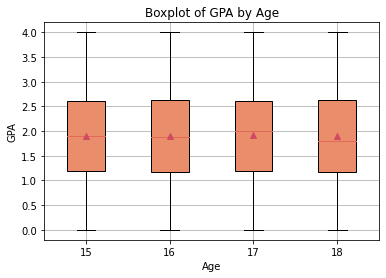

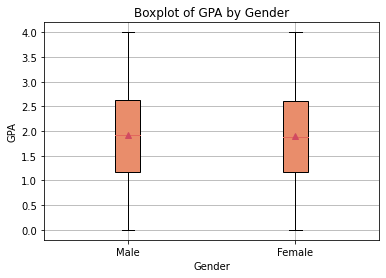

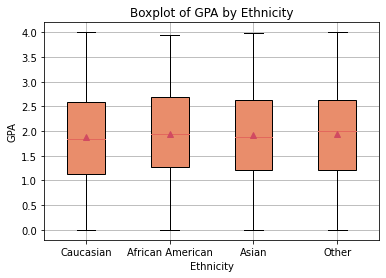

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns  # Importing seaborn to choose color palette

# Defining the color palette
sns.set_palette("flare")  # Choosing the 'flare' palette from seaborn

# Generating data for the Age boxplot
data_age = df.select('Age', 'GPA').toPandas()

# Plotting the Age boxplot
plt.figure(figsize=(6, 4))
plt.boxplot([data_age[data_age['Age'] == age]['GPA'] for age in sorted(data_age['Age'].unique())],
            labels=sorted(data_age['Age'].unique()), patch_artist=True, showmeans=True)
plt.xlabel('Age')
plt.ylabel('GPA')
plt.title('Boxplot of GPA by Age')
plt.grid(True)
plt.show()


# Generating data for the Gender boxplot
data_gender = df.select('Gender', 'GPA').toPandas()

# Plotting the Gender boxplot
plt.figure(figsize=(6, 4))
plt.boxplot([data_gender[data_gender['Gender'] == gender]['GPA'] for gender in sorted(data_gender['Gender'].unique())],
            labels=['Male', 'Female'], patch_artist=True, showmeans=True)
plt.xlabel('Gender')
plt.ylabel('GPA')
plt.title('Boxplot of GPA by Gender')
plt.grid(True)
plt.show()


# Gerando os dados para o boxplot de etnia (Ethnicity)
data_ethnicity = df.select('Ethnicity', 'GPA').toPandas()

# Generating data for the Ethnicity boxplot
data_ethnicity = df.select('Ethnicity', 'GPA').toPandas()

# Plotting the Ethnicity boxplot
plt.figure(figsize=(6, 4))
plt.boxplot([data_ethnicity[data_ethnicity['Ethnicity'] == eth]['GPA'] for eth in sorted(data_ethnicity['Ethnicity'].unique())],
            labels=['Caucasian', 'African American', 'Asian', 'Other'], patch_artist=True, showmeans=True)
plt.xlabel('Ethnicity')
plt.ylabel('GPA')
plt.title('Boxplot of GPA by Ethnicity')
plt.grid(True)
plt.show()



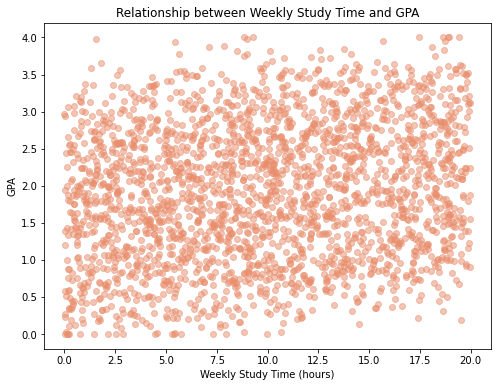

In [0]:
# Plotting a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df.select('StudyTimeWeekly').collect(), df.select('GPA').collect(), alpha=0.5)
plt.xlabel('Weekly Study Time (hours)')
plt.ylabel('GPA')
plt.title('Relationship between Weekly Study Time and GPA')
plt.show()


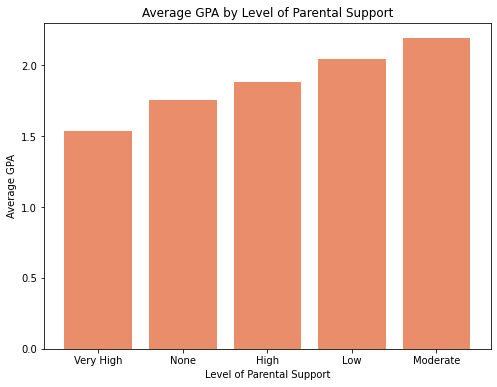

In [0]:
# Grouping by level of parental support and calculating mean GPA
parental_support_gpa = df.groupby('ParentalSupport').agg({'GPA': 'mean'}).toPandas()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(parental_support_gpa['ParentalSupport'], parental_support_gpa['avg(GPA)'])
plt.xlabel('Level of Parental Support')
plt.ylabel('Average GPA')
plt.title('Average GPA by Level of Parental Support')
plt.xticks(parental_support_gpa['ParentalSupport'], ['None', 'Low', 'Moderate', 'High', 'Very High'])
plt.show()


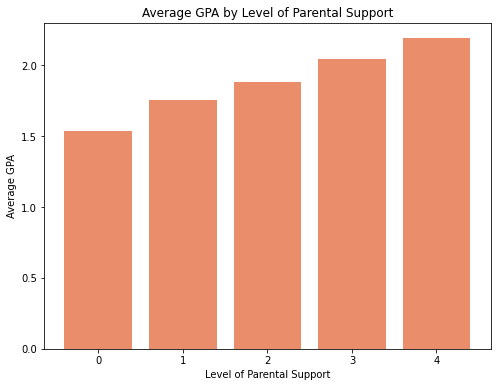

In [0]:
# Grouping by level of parental support and calculating mean GPA
parental_support_gpa = df.groupby('ParentalSupport').agg({'GPA': 'mean'}).toPandas()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(parental_support_gpa['ParentalSupport'], parental_support_gpa['avg(GPA)'])
plt.xlabel('Level of Parental Support')
plt.ylabel('Average GPA')
plt.title('Average GPA by Level of Parental Support')
plt.xticks(parental_support_gpa['ParentalSupport'])
plt.show()


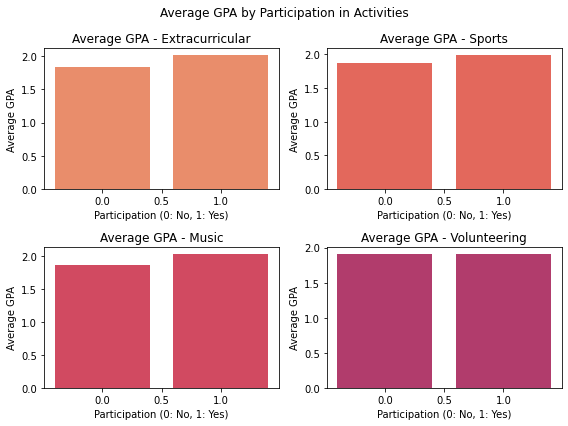

In [0]:
# Calculating the mean GPA for each activity
activities = ['Extracurricular', 'Sports', 'Music', 'Volunteering']
avg_gpa_activities = [df.groupby(act).agg({'GPA': 'mean'}).orderBy(act).toPandas() for act in activities]

# Plotting bar charts to compare GPA averages
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
fig.suptitle('Average GPA by Participation in Activities')

for i, ax in enumerate(axs.flatten()):
    ax.bar(avg_gpa_activities[i][activities[i]], avg_gpa_activities[i]['avg(GPA)'], color=sns.color_palette()[i])
    ax.set_xlabel('Participation (0: No, 1: Yes)')
    ax.set_ylabel('Average GPA')
    ax.set_title('Average GPA - {}'.format(activities[i]))

plt.tight_layout()
plt.show()


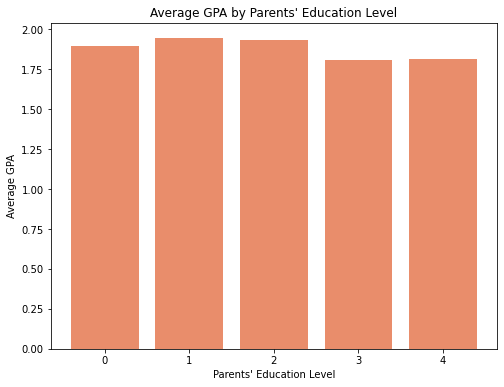

In [0]:
# Average GPA by parents' education level
parent_education_gpa = df.groupby('ParentalEducation').agg({'GPA': 'mean'}).toPandas()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(parent_education_gpa['ParentalEducation'], parent_education_gpa['avg(GPA)'])
plt.xlabel("Parents' Education Level")
plt.ylabel('Average GPA')
plt.title("Average GPA by Parents' Education Level")
plt.xticks(parent_education_gpa['ParentalEducation'])
plt.show()


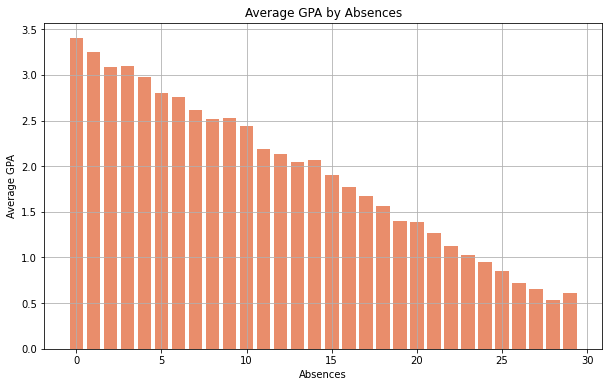

In [0]:
# Grouping by absences (Absences) and calculating the average GPA
avg_gpa_by_absences = df.groupby('Absences').agg({'GPA': 'mean'}).orderBy('Absences').toPandas()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_gpa_by_absences['Absences'], avg_gpa_by_absences['avg(GPA)'])
plt.xlabel('Absences')
plt.ylabel('Average GPA')
plt.title('Average GPA by Absences')
plt.grid(True)
plt.show()
